#  <font color=green>Credit Card Fraud Detection</font>

In [61]:
import pandas as pd  #Importing of libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import sys
from simple_colors import *
import string
from matplotlib import gridspec
import warnings
warnings.filterwarnings('ignore')

# Create the cross validation framework 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV


# Import the imbalance Learn module
from imblearn.pipeline import make_pipeline ## Create a Pipeline using the provided estimators .
from imblearn.under_sampling import NearMiss  ## perform Under-sampling  based on NearMiss methods. 
from imblearn.over_sampling import SMOTE  ## PerformOver-sampling class that uses SMOTE. 

# import the metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, accuracy_score

# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# For the performance let's use some metrics from SKLEARN module
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from credit_card_main import *

# Preprocessing of Dataset 

In [75]:
data ="global"
pd.set_option('display.max_rows', 200)

# class PreProcessing():
    
#     def processing(self):
#         print("Reading & importing CSV file using pandas")
#         data=reading()
#         extracting(data)
#         print(data)
#         return data
class read():

#     def __init__(self,data):
#         self.data = data

    def reading(self):
        data = pd.read_csv('creditcard.csv') #reading & importing CSV file using pandas
        return data
    
class extract():

    def __init__(self,data):
        self.data=data

    def extracting(self):
        print(self.data.columns) #dataset methods to extract values
        print(self.data.shape) #Data Exploration 
        print(self.data.head)

class PreProcessing():

    def processing(self,data):
        self.data=data
    
    def processing(self):
        print("Reading & importing CSV file using pandas")
        d1 = read()
        data = d1.reading()
        d2 = extract(data)
        d2.extracting()

        print(data)
        return data

def main():
    
    dm = PreProcessing()
    data = dm.processing()
    
if __name__ == "__main__":
    main()

Reading & importing CSV file using pandas
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)
<bound method NDFrame.head of             Time         V1         V2        V3         V4         V5  \
0            0.0  -1.359807  -0.072781  2.536347  -0.072781  -0.072781   
1            0.0   1.191857   0.266151  0.166480   0.266151   0.266151   
2            1.0  -1.358354  -1.340163  1.773209  -1.340163  -1.340163   
3            1.0  -0.966272  -0.185226  1.792993  -0.185226  -0.185226   
4            2.0  -1.158233   0.877737  1.548718   0.877737   0.877737   
...          ...        ...        ...       ...        ...        ...   
284802  172786.0 -11.881118  10.071785 -9.834783  10.071785  10.071785   
284803  172787.0  -0.732789  -0.055080  2.035030  -0.05508

In [76]:
data=read().reading() #reading and getting data back in pandas dataframe

In [77]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,-0.072781,-0.072781,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,-0.021053,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.266151,0.266151,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,0.014724,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,-1.340163,-1.340163,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.059752,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.185226,-0.185226,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,0.061458,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.877737,0.877737,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.215153,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,10.071785,10.071785,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,0.823731,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.055080,-0.055080,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-0.053527,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.301254,-0.301254,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,-0.026561,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.530483,0.530483,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.104533,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [65]:
# def extracting(data):
#     print(data.columns) #dataset methods to extract values
#     print(data.shape) #Data Exploration 
#     print(data.head)

extract(data).extracting()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)
<bound method NDFrame.head of             Time         V1         V2        V3         V4         V5  \
0            0.0  -1.359807  -0.072781  2.536347  -0.072781  -0.072781   
1            0.0   1.191857   0.266151  0.166480   0.266151   0.266151   
2            1.0  -1.358354  -1.340163  1.773209  -1.340163  -1.340163   
3            1.0  -0.966272  -0.185226  1.792993  -0.185226  -0.185226   
4            2.0  -1.158233   0.877737  1.548718   0.877737   0.877737   
...          ...        ...        ...       ...        ...        ...   
284802  172786.0 -11.881118  10.071785 -9.834783  10.071785  10.071785   
284803  172787.0  -0.732789  -0.055080  2.035030  -0.055080  -0.055080   
284804  172788.0   1.91956

## Sampling of Data

In [66]:
data = data.sample(frac = 0.2, random_state = 2) #Sampling
# random_state helps assure that you always get the same output when you split the data
# this helps create reproducible results and it does not actually matter what the number is
# frac is percentage of the data that will be returned
print(data.shape)

(56961, 31)


## Plotting of Histograms and Boxplots

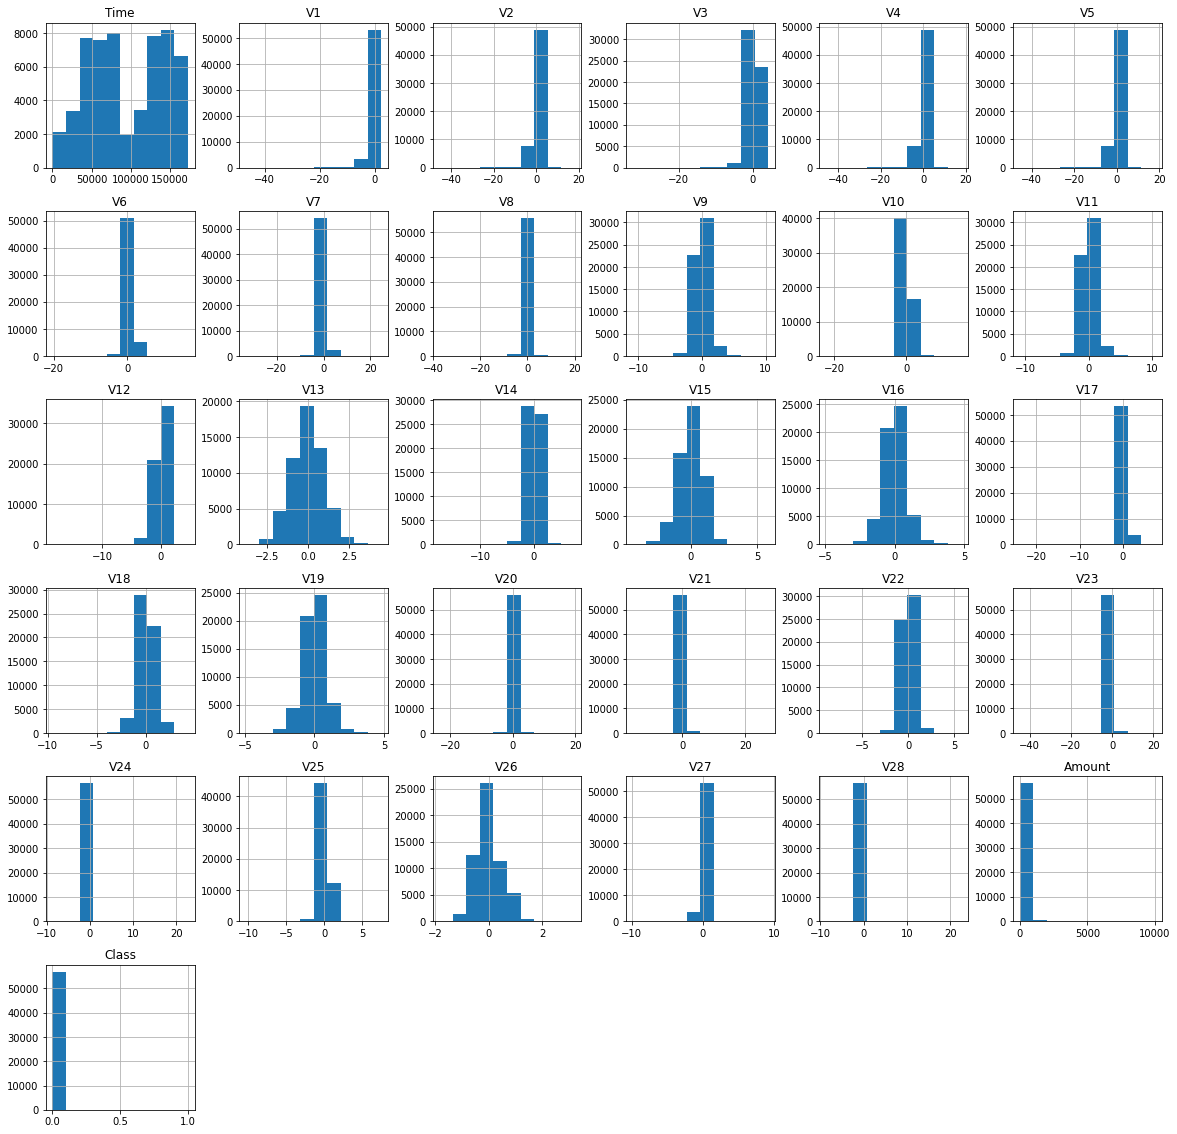

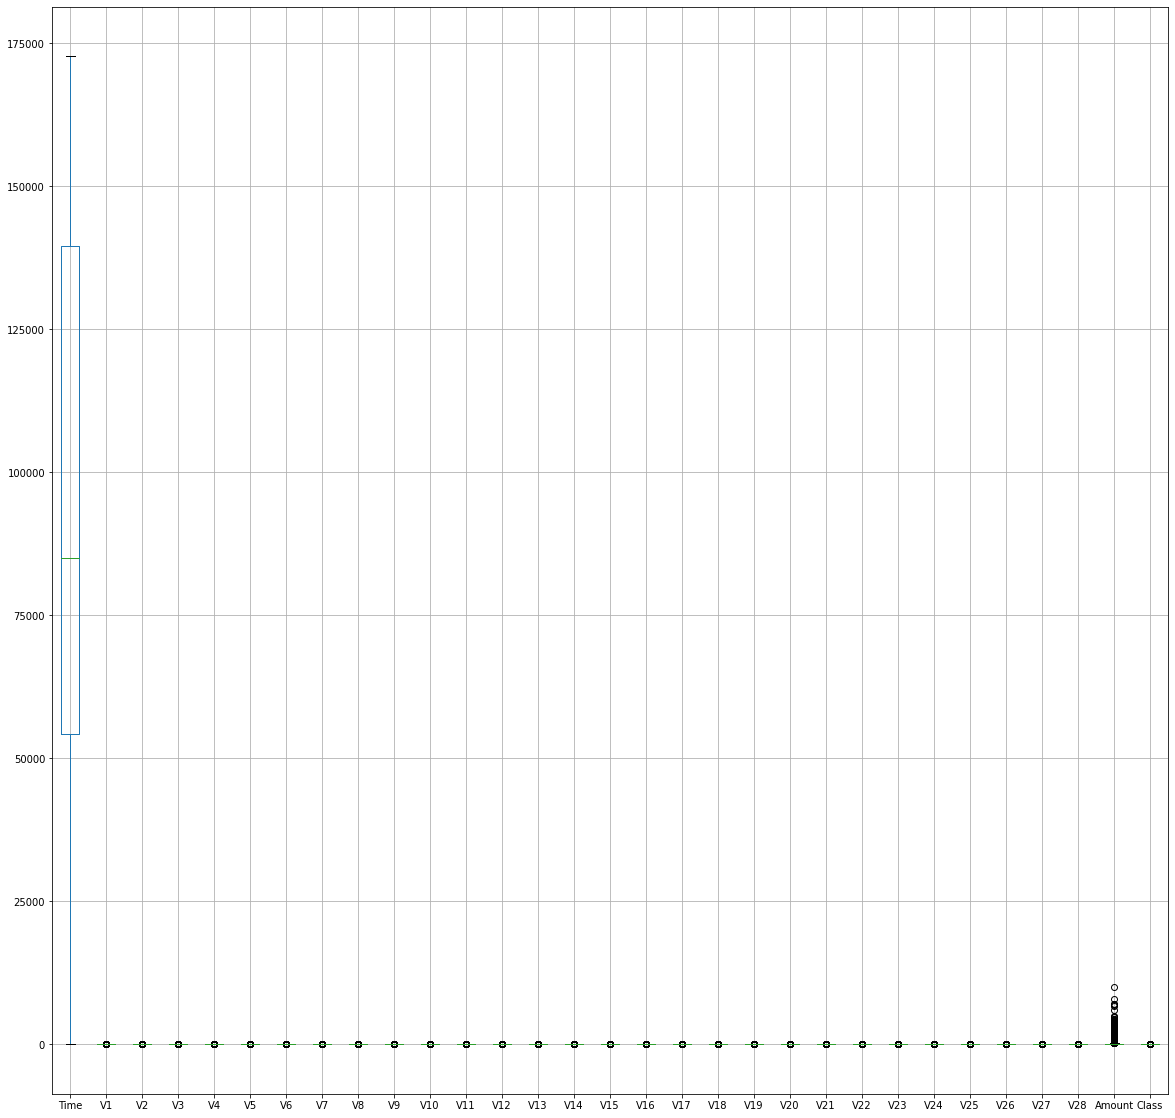

In [67]:
# class plotting():
    
#     @staticmethod
#     def plot():
#         # plot the histogram of each parameter in csv file
#         data.hist(figsize = (20, 20)) #histogram of all columns
#         plt.show()

#         # boxplot of each parameter in csv file	
#         boxplot = data.boxplot(grid=True,figsize=(20,20))  #boxplot of all values
#         plt.show()

plotting.plot() #histogram and boxplot of data

You can see most of the V's are clustered around 0 with some or no outliers. Notice we have very few fraudulent cases over valid cases in our class histogram.

In [68]:
print(data.Time.head) #Time coloumn head
print(data.Amount.head) #Amount coloumn head
print(data.Class.head)  #Class coloumn head

<bound method NDFrame.head of 225184    144140.0
116637     74369.0
99414      67107.0
217619    140965.0
279878    169155.0
            ...   
236948    149033.0
47150      43103.0
64513      51176.0
57548      47956.0
282961    171273.0
Name: Time, Length: 56961, dtype: float64>
<bound method NDFrame.head of 225184     12.82
116637    256.39
99414      16.44
217619    270.00
279878      1.29
           ...  
236948      0.89
47150       9.85
64513       8.90
57548       4.45
282961     54.05
Name: Amount, Length: 56961, dtype: float64>
<bound method NDFrame.head of 225184    0
116637    0
99414     0
217619    0
279878    0
         ..
236948    0
47150     0
64513     0
57548     0
282961    0
Name: Class, Length: 56961, dtype: int64>


## Scipy functions on Data DF

In [69]:
from scipy import linalg
from scipy import signal, misc
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix
from scipy.stats import norm

A=data.to_numpy() #convert data df to numpy array

print(A) #printing numpy array
print("\nNorm:",linalg.norm(A)) #displaying Norm of numpy array

n = norm.cdf(A) #cdf form of norm
print("\n",n)
print("\nLength of n: ",len(n),"\n") #length of n

print(norm.ppf(A)) #printing one tail probabality

[[ 1.44140000e+05 -5.81460074e-01  9.50267100e-01 ... -1.26279082e-01
   1.28200000e+01  0.00000000e+00]
 [ 7.43690000e+04  6.86729592e-01 -7.85585932e-01 ...  7.98380370e-02
   2.56390000e+02  0.00000000e+00]
 [ 6.71070000e+04 -8.48394796e-01  1.21431274e+00 ...  1.27724370e-01
   1.64400000e+01  0.00000000e+00]
 ...
 [ 5.11760000e+04  1.27948862e+00  5.01814730e-01 ...  2.97980400e-03
   8.90000000e+00  0.00000000e+00]
 [ 4.79560000e+04 -5.00365590e-01  9.24502016e-01 ...  1.06836219e-01
   4.45000000e+00  0.00000000e+00]
 [ 1.71273000e+05  1.90072760e+00 -7.72762720e-02 ... -1.07314670e-02
   5.40500000e+01  0.00000000e+00]]

Norm: 25351928.84939225

 [[1.         0.28046521 0.82901172 ... 0.44975551 1.         0.5       ]
 [1.         0.75387343 0.21605505 ... 0.53181696 1.         0.5       ]
 [1.         0.19810907 0.88768584 ... 0.55081645 1.         0.5       ]
 ...
 [1.         0.89963748 0.69210107 ... 0.50118877 1.         0.5       ]
 [1.         0.30840884 0.8223875  ... 0

## Calculation of Fraud & Valid Cases

In [70]:
#determine the number of fraud cases
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

print(red('                            Dataframe of Fraud cases', 'bold'))
print(fraud.head()) #Dataframe of Fraud cases   
print(green('                            Dataframe of Valid cases', 'bold'))
print(valid.head()) #Dataframe of Valid cases


outlier_fraction = len(fraud) / float(len(valid))
print("Fraction of Outliners: ",outlier_fraction)


print('Fraud Cases: {}'  .format(len(fraud)))
print('Valid Cases: {}'  .format(len(valid)))

# Export the pandas DataFrame into HDF5(Writing dataframe result in hdf5 file)
df = pd.DataFrame(fraud);
h5File = "fromdf.h5";

# Use pandas again to read data from the hdf5 file to the pandas DataFrame
df.to_hdf(h5File, "/data/d1");
df1 = pd.read_hdf(h5File, "/data/d1");

print(red('\n                  DataFrame read from the HDF5 file through pandas:', 'bold'));
print(df1);

                            Dataframe of Fraud cases
           Time         V1         V2         V3         V4         V5  \
42528   41138.0  -4.595617   5.083690  -7.581015   5.083690   5.083690   
102445  68207.0 -13.192671  12.785971  -9.906650  12.785971  12.785971   
18466   29526.0   1.102804   2.829168  -3.932870   2.829168   2.829168   
6331     7526.0   0.008430   4.137837  -6.240697   4.137837   4.137837   
151009  94362.0 -26.457745  16.497472 -30.177317  16.497472  16.497472   

              V6         V7         V8        V9  ...        V21       V22  \
42528  -1.729185  -8.190192   2.714670 -7.083169  ...   2.248971  0.566844   
102445  5.760059 -18.750889 -37.353443 -0.391540  ...  27.202839 -8.887017   
18466  -1.800904   1.672734  -0.300240 -2.783011  ...  -0.106994 -0.250050   
6331   -3.353060  -1.631735   0.154612 -2.795892  ...   0.364514 -0.608057   
151009 -1.227904 -31.197329 -11.438920 -9.462573  ...  -8.755698  3.460893   

             V23       V24       

[84 rows x 31 columns]


## Main Named Features Plot 

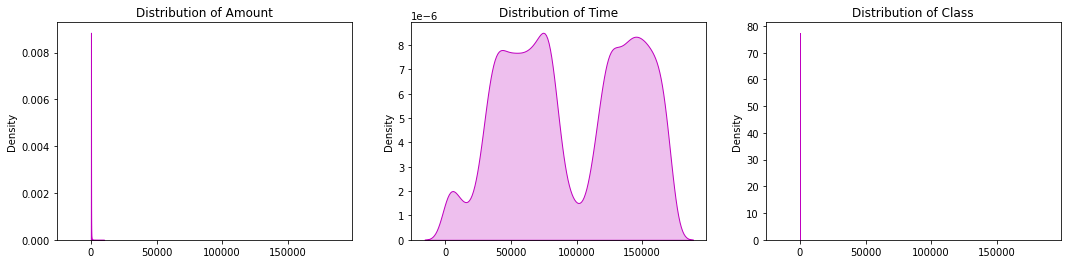

In [71]:
# plot the named features 
f, axes = plt.subplots(1, 3, figsize=(18,4), sharex = True)

amount_value = data['Amount'].values # values
time_value = data['Time'].values # values
class_value = data['Class'].values # values

sns.distplot(amount_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Amount')
sns.distplot(time_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[1]).set_title('Distribution of Time')
sns.distplot(class_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[2]).set_title('Distribution of Class')

plt.show()

In [72]:
print("Average Amount in a Fraudulent Transaction: " + str(data[data["Class"] == 1]["Amount"].mean())) #fraud
print("Average Amount in a Valid Transaction: " + str(data[data["Class"] == 0]["Amount"].mean())) #valid

print("\nSummary of the feature - Amount" + "\n-------------------------------")
print(data["Amount"].describe())

Average Amount in a Fraudulent Transaction: 87.55119047619048
Average Amount in a Valid Transaction: 89.96044358879688

Summary of the feature - Amount
-------------------------------
count    56961.000000
mean        89.956891
std        242.341745
min          0.000000
25%          5.690000
50%         22.060000
75%         78.990000
max      10000.000000
Name: Amount, dtype: float64


## Distribution Of Feature Density

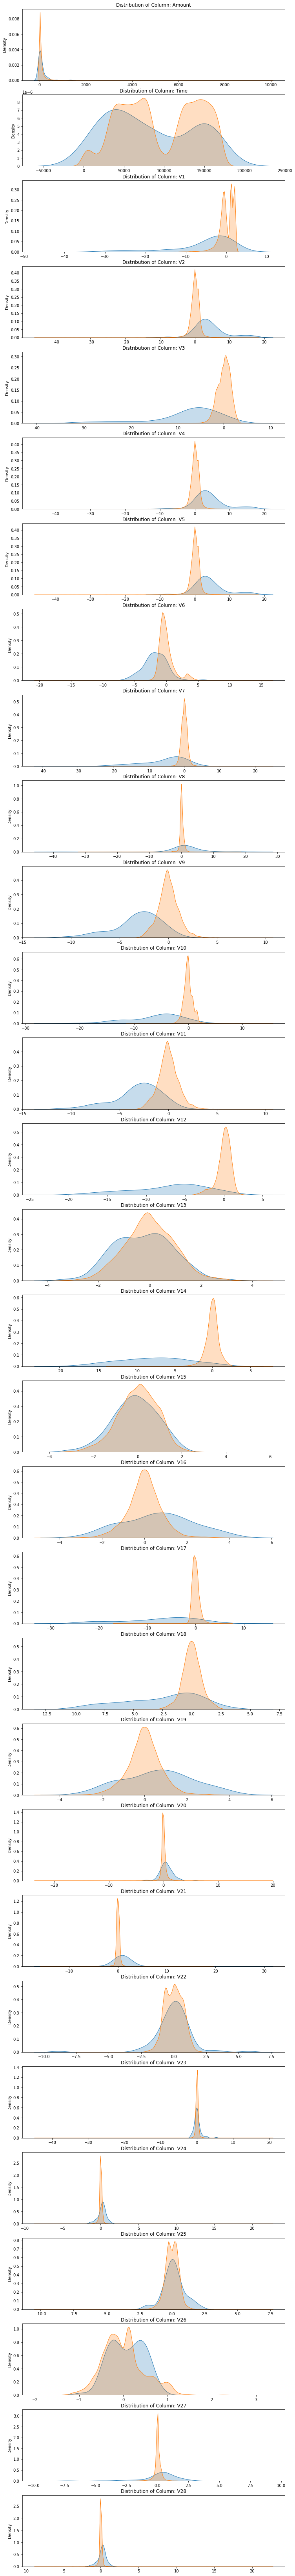

In [73]:
# Reorder the columns Amount, Time then the rest

data_plot = data.copy()
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace = True)
data_plot.insert(0, 'Amount', amount)

# Plot the distributions of the features
columns = data_plot.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
 sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + str(index))
plt.show()

# Boxplots of Valid and Fraud Cases

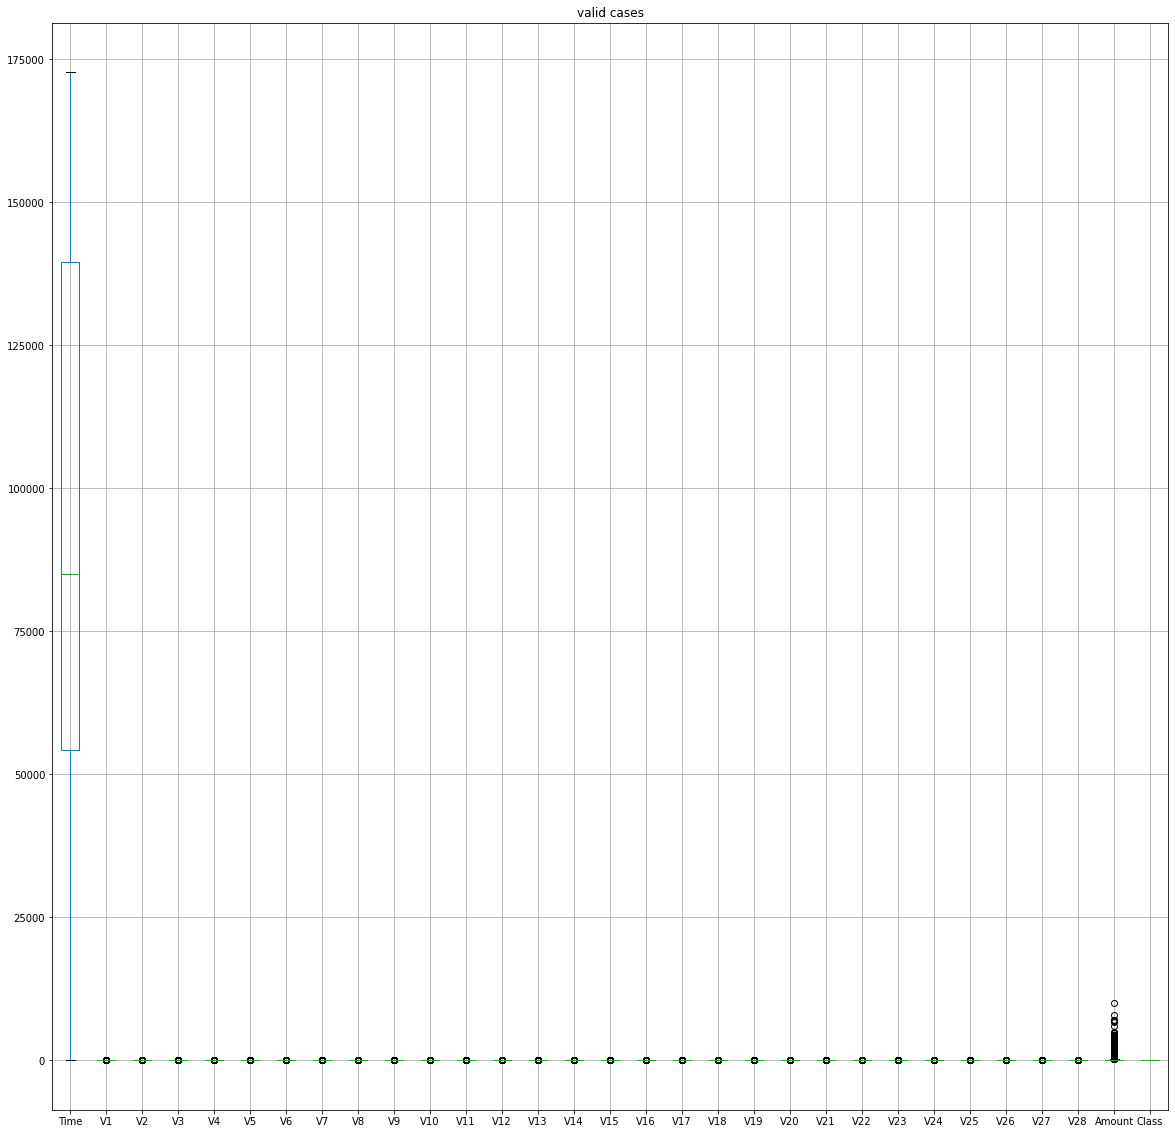

In [98]:
boxplot = valid.boxplot(grid=True,figsize=(20,20)).set_title('valid cases')#Boxplot of Valid cases

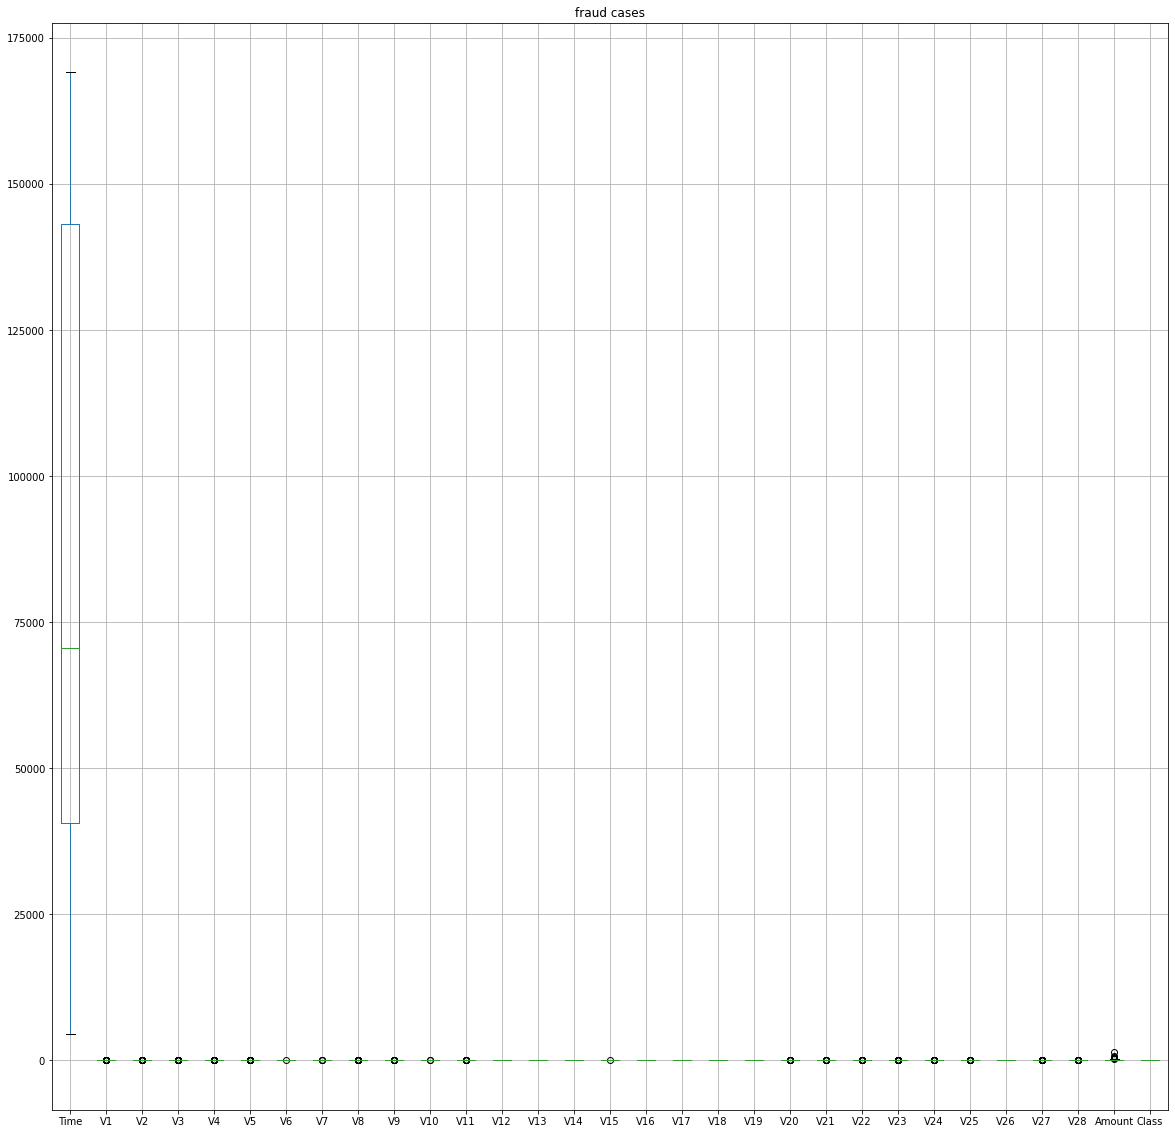

In [99]:
boxplot = fraud.boxplot(grid=True,figsize=(20,20)).set_title('fraud cases')#Boxplot of fraud cases

## Correlation Matrix for Data

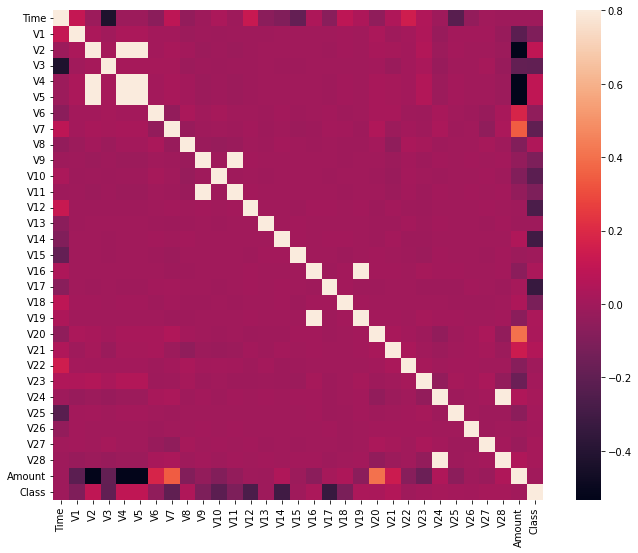

In [80]:
# correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [18]:
# correlation matrix
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.111667,-0.016707,-0.424136,-0.016707,-0.016707,-0.068847,0.089139,-0.043545,-0.010911,0.033196,-0.010911,0.121072,-0.065430,-0.098321,-0.184931,0.034488,-0.071305,0.091256,0.034488,-0.052162,0.044668,0.145870,0.046530,-0.007985,-0.230782,-0.040386,-0.001877,-0.007985,-0.009591,-0.010186
V1,0.111667,1.000000,0.031777,0.001238,0.031777,0.031777,0.006783,0.006155,-0.012492,-0.005936,-0.009206,-0.005936,-0.005197,-0.002792,-0.000379,0.002097,0.000242,0.000600,0.004509,0.000242,0.029908,-0.005202,0.008510,0.043053,-0.025783,0.006578,0.004419,0.004048,-0.025783,-0.218678,-0.101743
V2,-0.016707,0.031777,1.000000,0.014764,1.000000,1.000000,0.007860,0.019410,0.007874,-0.013981,-0.004086,-0.013981,-0.004135,0.000090,0.001029,0.000650,-0.001616,-0.005484,0.004320,-0.001616,0.023487,0.015268,0.008297,0.051568,-0.013773,0.010750,0.000626,0.002775,-0.013773,-0.533151,0.095949
V3,-0.424136,0.001238,0.014764,1.000000,0.014764,0.014764,0.017138,0.017196,-0.015546,-0.002646,-0.009395,-0.002646,-0.004810,0.000903,-0.006696,-0.003343,-0.000240,-0.001393,0.002043,-0.000240,0.007207,-0.018120,0.007351,0.026959,-0.023718,0.000281,0.002811,0.014700,-0.023718,-0.192001,-0.199767
V4,-0.016707,0.031777,1.000000,0.014764,1.000000,1.000000,0.007860,0.019410,0.007874,-0.013981,-0.004086,-0.013981,-0.004135,0.000090,0.001029,0.000650,-0.001616,-0.005484,0.004320,-0.001616,0.023487,0.015268,0.008297,0.051568,-0.013773,0.010750,0.000626,0.002775,-0.013773,-0.533151,0.095949
V5,-0.016707,0.031777,1.000000,0.014764,1.000000,1.000000,0.007860,0.019410,0.007874,-0.013981,-0.004086,-0.013981,-0.004135,0.000090,0.001029,0.000650,-0.001616,-0.005484,0.004320,-0.001616,0.023487,0.015268,0.008297,0.051568,-0.013773,0.010750,0.000626,0.002775,-0.013773,-0.533151,0.095949
V6,-0.068847,0.006783,0.007860,0.017138,0.007860,0.007860,1.000000,-0.041475,0.026380,0.002216,0.013799,0.002216,0.001868,-0.006462,0.003359,-0.007127,-0.000167,0.005066,-0.003587,-0.000167,0.019479,0.023143,-0.004009,-0.008979,0.023215,0.001417,-0.010280,-0.026778,0.023215,0.178502,-0.050737
V7,0.089139,0.006155,0.019410,0.017196,0.019410,0.019410,-0.041475,1.000000,-0.025002,-0.003685,0.000524,-0.003685,0.003350,-0.012276,0.002139,-0.013412,-0.008478,0.008468,0.005320,-0.008478,0.049893,-0.014611,0.005369,-0.005305,0.033519,-0.005901,-0.000251,-0.050415,0.033519,0.343688,-0.202078
V8,-0.043545,-0.012492,0.007874,-0.015546,0.007874,0.007874,0.026380,-0.025002,1.000000,-0.017738,-0.031317,-0.017738,-0.000138,-0.002226,0.009590,-0.000793,-0.003424,0.000175,-0.003480,-0.003424,0.013184,-0.053607,0.028815,0.014496,-0.002008,-0.001546,-0.000693,0.014424,-0.002008,-0.094870,0.044112
V9,-0.010911,-0.005936,-0.013981,-0.002646,-0.013981,-0.013981,0.002216,-0.003685,-0.017738,1.000000,-0.003524,1.000000,0.004734,0.001643,-0.001652,-0.001065,0.002222,0.003014,-0.002848,0.002222,0.000799,-0.016384,0.005628,-0.007530,0.007615,0.000170,0.004000,0.002353,0.007615,-0.039163,-0.110288


You can see a lot of the values are close to 0 . Most of them are fairly unrelated. The lighter squares signify a stronger correlation. 

## Organizing the Data

In [19]:
# get the columns from the dataframe
columns = data.columns.tolist()

# filter the columns to remove the data we do not want
columns = [c for c in columns if c not in ['Class']]


# store the variable we will be predicting on which is class
target = 'Class'

# X includes everything except our class column
X = data[columns]


# Y includes all the class labels for each sample
# this is also one-dimensional
Y = data[target]

print(X.head)

# print the shapes of X and Y
print("\nShapes of X and Y Coloumns")
print(X.shape)
print(Y.shape)

<bound method NDFrame.head of             Time        V1        V2        V3        V4        V5        V6  \
225184  144140.0 -0.581460  0.950267  0.115938  0.950267  0.950267 -1.595678   
116637   74369.0  0.686730 -0.785586  0.945092 -0.785586 -0.785586 -0.193185   
99414    67107.0 -0.848395  1.214313  0.954869  1.214313  1.214313 -0.851855   
217619  140965.0 -1.104465  0.616952 -0.878973  0.616952  0.616952 -0.020623   
279878  169155.0  2.061985 -0.114758 -1.079406 -0.114758 -0.114758 -1.241109   
...          ...       ...       ...       ...       ...       ...       ...   
236948  149033.0  2.050734 -0.364010 -2.542843 -0.364010 -0.364010  3.318015   
47150    43103.0 -0.691761  1.173553  1.297379  1.173553  1.173553 -0.161227   
64513    51176.0  1.279489  0.501815 -0.470082  0.501815  0.501815 -0.218541   
57548    47956.0 -0.500366  0.924502  1.548853  0.924502  0.924502 -0.105022   
282961  171273.0  1.900728 -0.077276 -1.464224 -0.077276 -0.077276 -1.429530   

         

## Applying Isolation Forest Algorithm

In [20]:
state = 1

classifiers = { # define the outlier detection methods
    # contamination is the number of outliers we think there are
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    # number of neighbors to consider, the higher the percentage of outliers the higher you want to make this number
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

print("Fraction of Outliners")
print(outlier_fraction)

Fraction of Outliners
0.001476871142992774


In [21]:
y = data["Class"] # target 
X = data.iloc[:,0:30]

# Use SKLEARN for the split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45568, 30), (11393, 30), (45568,), (11393,))

## Fit & Predict the Model Parameters

In [22]:
# n_outliers = len(fraud)
# print("Length of fraud",n_outliers)

# for i, (clf_name, clf) in enumerate(classifiers.items()):
    
#     # fit the data and tag outliers
#     if clf_name == 'Local Outlier Factor':
#         y_pred = clf.fit_predict(X)
#         scores_pred = clf.negative_outlier_factor_
#     else:
#         clf.fit(X)
#         scores_pred = clf.decision_function(X)
#         y_pred = clf.predict(X)
        
#     # reshape the prediction values to 0 for valid and 1 for fraud
#     y_pred[y_pred == 1] = 0
#     y_pred[y_pred == -1] = 1

#     # calculate the number of errors
#     n_errors = (y_pred != Y).sum()
    
#     # classification matrix
#     print('{}: {}'.format(clf_name, n_errors))
#     print(accuracy_score(Y, y_pred))
#     print(classification_report(Y, y_pred))

#Fit and predict
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 
y_pred = rfc.predict(X_test)
  
print("The accuracy is", accuracy_score(y_test, y_pred)) 
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

The accuracy is 0.9992100412534012
The precision is 0.8888888888888888
The recall is 0.6956521739130435
The F1 score is 0.7804878048780488


Looking at precision for fraudulent cases (1) lets us know the percentage of cases that are getting correctly labeled. 'Precision' accounts for false-positives. 'Recall' accounts for false-negatives. Low numbers could mean that we are constantly calling clients asking them if they actually made the transaction which could be annoying.

Goal: To get better percentages.